<a href="https://colab.research.google.com/github/MaLuisa7/Machine_Learning_Lessons/blob/main/TAREAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 

1. Crear, modificar o eliminar columnas
2. Filtrar registros
3. Crear subconjuntos de datos
4. Crear grupos de datos 

## 0. Preparación de datos

In [1]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

In [3]:
# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
ticker = yf.Ticker('SPY')
end_date = '2023-01-23'
start_date = '2018-01-23'
sp500 = ticker.history(start=start_date,end=end_date)
print("Shape of SP 500 data is:", sp500.shape)
sp500.head(2)

Shape of SP 500 data is: (1258, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,0.0,0.0,0.0
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,0.0,0.0,0.0


In [4]:
sp500.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,86958900,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,91544900,0.0,0.0,0.0


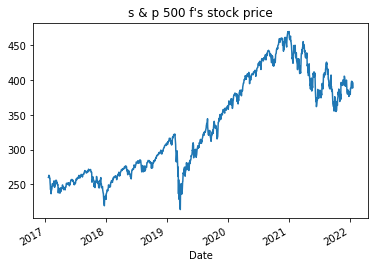

In [5]:
sp500['Close'].plot(title="s & p 500 f's stock price")

## 1. Crear, modificar o eliminar columnas

### Obtenemos retornos 

Info: [Calculate daily returns](https://towardsdatascience.com/calculate-and-plot-s-p-500-daily-returns-2ce359e014d6)

In [6]:
sp500['daily_return'] = (sp500['Close']/ sp500['Close'].shift(1)) -1
sp500.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,daily_return
Date,,,,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,0.0,0.0,0.0,NaN
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,0.0,0.0,0.0,-0.000388


### Por el momento, se descartan las columnas: Dividends	Stock Splits	Capital Gains

In [7]:
sp500.drop(columns = ['Dividends', 'Stock Splits', 'Capital Gains',], inplace = True)

In [8]:
sp500.head(2)

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,NaN
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388


## 2. Filtrar datos

Filtraremos todo el mes de agosto del año pasado

In [9]:
sp500[(sp500.index >= '2022-08-01') & (sp500.index <'2022-09-01')]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2022-08-01 00:00:00-04:00,405.613551,409.836739,404.870033,407.219543,69997500,-0.002961
2022-08-02 00:00:00-04:00,405.583856,409.430325,403.303747,404.533020,63435400,-0.006597
2022-08-03 00:00:00-04:00,406.753613,412.087117,406.456218,410.867767,67820600,0.015659
2022-08-04 00:00:00-04:00,410.788463,411.502241,408.875152,410.590210,45656600,-0.000676
2022-08-05 00:00:00-04:00,406.119174,410.570356,406.059695,409.896240,56814900,-0.001690
2022-08-08 00:00:00-04:00,411.660855,414.010366,408.270402,409.420380,53886100,-0.001161
2022-08-09 00:00:00-04:00,408.657062,409.182480,406.674348,407.794586,44931800,-0.003971
2022-08-10 00:00:00-04:00,415.160330,416.508591,413.118138,416.359863,68665700,0.021004
2022-08-11 00:00:00-04:00,419.333933,421.277014,415.586606,416.359863,59489700,0.000000


Filtraremos aquellos días en los que el close fue mayor al open.

In [10]:
sp500[(sp500.Close > sp500.Open) ]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,NaN
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578
2018-02-01 00:00:00-05:00,258.059695,259.886771,257.701609,258.527924,90102500,-0.001135
2018-02-06 00:00:00-05:00,238.659522,247.620511,237.521046,247.097168,355026800,0.019702
2018-02-09 00:00:00-05:00,239.449108,242.029060,232.214228,240.091812,283565300,0.015022
...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,0.007013
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,0.012648
2023-01-12 00:00:00-05:00,396.670013,398.489990,392.420013,396.959991,90157700,0.003641


## 3. Crear subconjuntos de datos

A continuación, separaremos el dataframe en tres subconjuntos, aquellos días en los que los retornos fueron mayores a cero, otro en donde los retornos fueron menores a 0 y finalmente, en donde los retornos fueron iguales a cero.

In [11]:
positive_returns = sp500.query("daily_return > 0")
negative_returns = sp500.query("daily_return < 0")
zero_returns =   sp500.query("daily_return == 0")

In [12]:
print("Shape of positive returns df is: ", positive_returns.shape)
positive_returns.head(2)

Shape of positive returns df is:  (679, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-25 00:00:00-05:00,260.896726,260.997707,259.280802,260.107117,84587300,0.000424
2018-01-26 00:00:00-05:00,260.979323,263.164484,260.713057,263.118561,107743100,0.011578


In [13]:
print("Shape of negative returns df is: ", negative_returns.shape)
negative_returns.head(2)

Shape of negative returns df is:  (575, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-24 00:00:00-05:00,260.768146,261.392498,258.766623,259.996918,134816100,-0.000388
2018-01-29 00:00:00-05:00,262.521781,262.980848,261.208858,261.374115,90118300,-0.006630


In [14]:
print("Shape of zero returns df is: ", zero_returns.shape)
zero_returns.head(2)

Shape of zero returns df is:  (3, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-05-08 00:00:00-04:00,245.662449,246.427539,244.417999,246.049622,67499200,0.0
2018-10-08 00:00:00-04:00,266.997060,268.085338,265.555353,267.713287,87742200,0.0


## 4. Crear grupos de datos

In [15]:
sp500['month'] =sp500.index.month

In [16]:
month_mean = sp500.groupby('month').mean()
month_mean

,Open,High,Low,Close,Volume,daily_return
month,,,,,,
1,341.552229,343.741633,338.978689,341.609289,9.037117e+07,0.000472
2,325.897309,328.312284,323.470598,325.891084,1.053835e+08,-0.000864
3,317.592473,320.831250,314.373421,317.753751,1.337301e+08,-0.000200
4,322.164539,324.215648,319.714851,321.948079,8.986392e+07,0.001304
5,318.287495,320.544004,315.803610,318.426056,8.883967e+07,0.000205
6,325.582063,327.326636,323.388634,325.396581,8.055543e+07,0.000331
7,330.268343,332.143911,328.616426,330.910763,6.360371e+07,0.002116
8,341.980182,343.599753,340.371573,342.126213,6.383250e+07,0.000671
9,340.726171,342.519842,338.065014,340.124175,7.932465e+07,-0.001487


In [17]:
month_mean['classification_daily_return'] = [ 1  if x>0 else 0 for x in  month_mean.daily_return ]
month_mean

,Open,High,Low,Close,Volume,daily_return,classification_daily_return
month,,,,,,,
1,341.552229,343.741633,338.978689,341.609289,9.037117e+07,0.000472,1
2,325.897309,328.312284,323.470598,325.891084,1.053835e+08,-0.000864,0
3,317.592473,320.831250,314.373421,317.753751,1.337301e+08,-0.000200,0
4,322.164539,324.215648,319.714851,321.948079,8.986392e+07,0.001304,1
5,318.287495,320.544004,315.803610,318.426056,8.883967e+07,0.000205,1
6,325.582063,327.326636,323.388634,325.396581,8.055543e+07,0.000331,1
7,330.268343,332.143911,328.616426,330.910763,6.360371e+07,0.002116,1
8,341.980182,343.599753,340.371573,342.126213,6.383250e+07,0.000671,1
9,340.726171,342.519842,338.065014,340.124175,7.932465e+07,-0.001487,0


In [18]:
month_mean.groupby('classification_daily_return').mean()

,Open,High,Low,Close,Volume,daily_return
classification_daily_return,,,,,,
0,334.216998,336.584718,331.484884,334.032205,1.019806e+08,-0.000720
1,332.538515,334.541798,330.365167,332.629519,7.982632e+07,0.000982


# Tarea 3 

## Tarea 3 de salón de clases con valor de 2 puntos.

In [38]:
data =  list(sp500.daily_return.dropna())
data[:5]

[-0.000388365963700843,
 0.0004238472347048994,
 0.011577707407672388,
 -0.0066298850052117775,
 -0.010256859925272366]

### Media

In [55]:
data1 = list(sp500.daily_return.dropna())

In [53]:
def promedio(data):
  sum_data = 0 
  for item in data:
    sum_data = item + sum_data

  mean =  sum_data / len(data)
  return mean 
  

In [81]:
promedio(data1)

0.0004273643539542912

### Mediana

In [79]:
def mediana(data):
  data.sort()
  half =int( len(data)/2)
  if len(data)%2==0:
    median = (data[half -1] + data[half]) /2
  else:
    median =  data[half]
  return median


In [82]:
mediana( data1)

0.0007276967275564594

### Desviación Estandar

In [92]:
def standard_deviation(data):
  lst1 = []
  b  = 0 
  average = promedio(data)
  for item in data:
    a = (item - average)**2
    b = a + b
  c = b/len(data)
  d = np.sqrt(c)
  return d 

In [89]:
sp500.daily_return.dropna().describe()

count    1257.000000
mean        0.000427
std         0.013617
min        -0.109424
25%        -0.005229
50%         0.000728
75%         0.007150
max         0.090603
Name: daily_return, dtype: float64

### Comprueba  si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

In [95]:
# from scipy.stats import shapiro
from scipy import stats 

def prueba_normalidad(data, valor_alfa):
  stat, pvalor = stats.shapiro(data)
  pvalor = round(pvalor,4)
  if pvalor < valor_alfa:
      return print('La distribución no es normal, p-valor = ', pvalor)
  else:
      return print('La distribución es normal, p-valor = ', pvalor)

prueba_normalidad(data1, 0.05)

La distribución no es normal, p-valor =  0.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


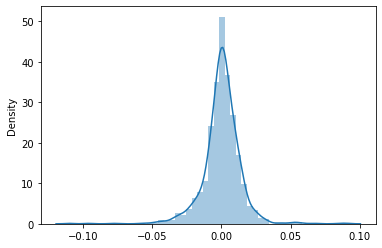

In [98]:
import seaborn as sns

sns.distplot(data1)